In [1]:
import numpy as np
import matplotlib.pyplot as plt

from recsim.environments.interest_evolution import create_multiuser_environment as iv_create_environment
from recsim.environments.interest_exploration import create_multiuser_environment as ie_create_environment
from recsim.environments.long_term_satisfaction import create_multiuser_environment as lts_create_environment

In [2]:
env_config = {
    "slate_size": 3,
    "seed": 2022,
    "num_candidates": 10,
    "resample_documents": False,
    "num_users": 2,
}

# Interest Evolution

In [3]:
env = iv_create_environment(env_config)

In [4]:
env.user_model[0]._user_state.time_budget

200.0

In [5]:
user_obs, doc_obs = env.reset()

interests = []
for _ in range(1000):
    random_slates = [
        np.random.choice(env_config["num_candidates"], env.slate_size, replace=False)
        for _ in range(env_config["num_users"])
    ]
    user_obs, doc_obs, response, done = env.step(slates=random_slates)
    
    interests.append(env.user_model[0]._user_state.user_interests)
    
    if done:
        break

In [6]:
interests = np.array(interests)

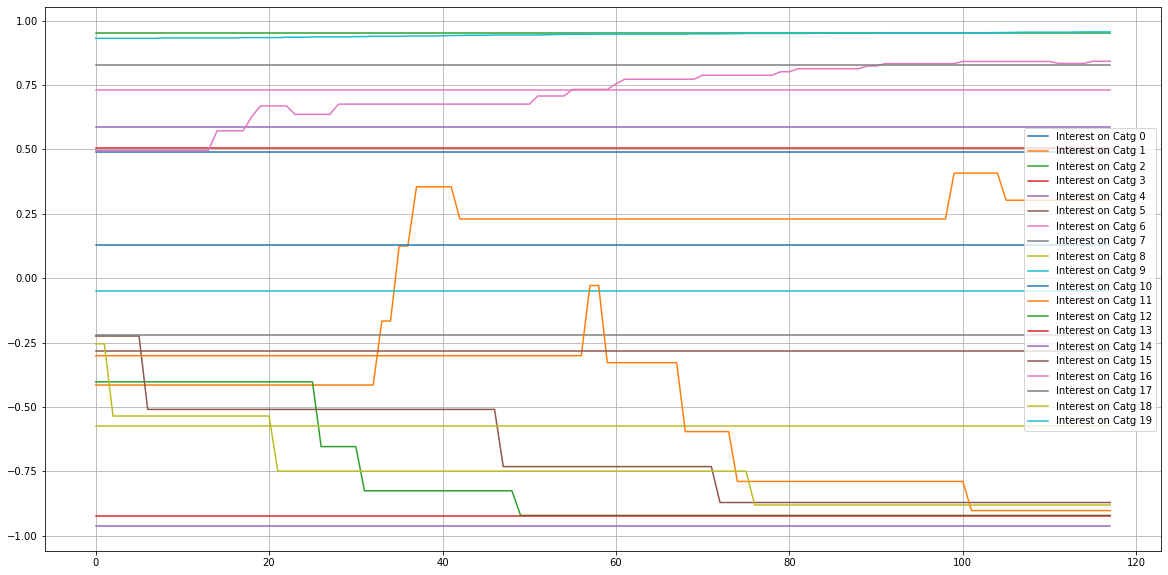

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(interests)), interests)
plt.legend([f'Interest on Catg {i}' for i in range(20)])
plt.grid()
plt.show()

## Findings / Issues

1. Interest evolves by the documents that has been exposed to users.
2. There's no negative effect even if the agent shows irrelevant documents.
3. Initial interests are uniformly (or normally) distributed. This could be wrong assumttion. Interest is more likely to be as binary: like or not (or haven't seen before).
4. All category shares a same model. But in practice, some interest are not likely to be changed. Reaction model could be also different.
5. This simulator assumes that the state of user soley depends on the system. But users may interact with unknown other systems as well. As such, the interest could evolve by some unobserved reasons.
6. Reaction model does not consider the order of documents in the slate.

# Long-Term Satisfaction

In [8]:
env = lts_create_environment(env_config)

In [9]:
user_obs, doc_obs = env.reset()

satisfactions = []
npes = []
chocs = []
for i_turn in range(1000):
    random_slates = [
        [np.random.randint(0, env_config["slate_size"]) for _ in range(env.slate_size)] 
        for _ in range(env_config["num_users"])
    ]
    user_obs, doc_obs, response, done = env.step(slates=random_slates)
    
    satisfactions.append(env.user_model[0]._user_state.satisfaction)
    npes.append(env.user_model[0]._user_state.net_positive_exposure)
    chocs.append(env.user_model[0]._user_state.choc_mean)
    
    if done:
        print(i_turn)
        break

59


In [10]:
satisfactions = np.array(satisfactions)
npes = np.array(npes)
chocs = np.array(chocs)

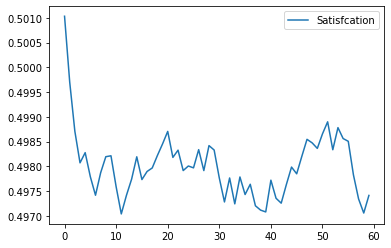

In [11]:
plt.figure()
plt.plot(range(len(satisfactions)), satisfactions)
plt.legend(['Satisfcation'])
plt.show()

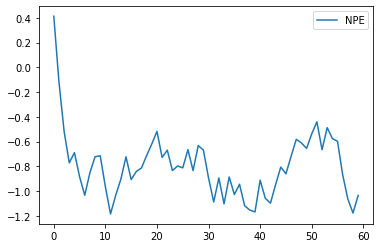

In [12]:
plt.figure()
plt.plot(range(len(npes)), npes)
plt.legend(['NPE'])
plt.show()

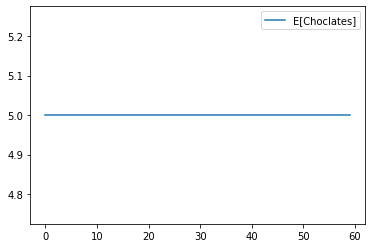

In [13]:
# constant state

plt.figure()
plt.plot(range(len(chocs)), chocs)
plt.legend(['E[Choclates]'])
plt.show()